In [1]:
import pandas as pd
from finvader import finvader
data = pd.read_csv('twitter_financial_news1.csv',index_col=None)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
# use the classifier
import numpy as np
data['newscontents']=data['newscontents'].astype(str)
#data['newscontents'] = data['newscontents'].encode()
data['finvader'] = data['newscontents'].apply(finvader,use_sentibignomics = True, use_henry = True, indicator="compound")

In [6]:
# discretize compound indicator into 3 scores
conditions = [
    (data['finvader'] > 0.33),
    (data['finvader']> - 0.33) & (data['finvader'] < 0.33),
    (data['finvader'] < - 0.33)
]
values = [1, 0, -1]
data['finvader'] = np.select(conditions, values)
data

,newscontents,label,finvader
0,$BYND JPMorgan reels in expectations on Beyond...,-1,0
1,$CCL $RCL Nomura points to bookings weakness a...,-1,-1
2,$CX Cemex cut at Credit Suisse J.P. Morgan on ...,-1,-1
3,$ESS BTIG Research cuts to Neutral,-1,0
4,$FNKO Funko slides after Piper Jaffray PT cut,-1,0
...,...,...,...
20170,wwe share $ 1 billion market ceo oust two,-1,0
20171,month low sale miss uncertainty outlook,-1,-1
20172,xeris pharma launch equity offering share 3 hour,-1,0
20173,yum stock tumble coronavirus pizza hut weak sa...,-1,-1


In [7]:
# calculate true positives (TP), true negatives (TN), false positives (FP) and false negatives (FN)
data['finvader_correct'] = np.where((data['label'] == data['finvader']), 1, 0)
data['finvader_TP'] = np.where((data['label'] == 1) & (data['finvader'] == 1), 1, 0)
data['finvader_TN'] = np.where((data['label'] == -1) & (data['finvader'] == -1), 1, 0)
data['finvader_FP'] = np.where((data['label'] != 1) & (data['finvader'] == 1), 1, 0)
data['finvader_FN'] = np.where((data['label'] != -1) & (data['finvader'] == -1), 1, 0)

In [8]:
# print accuracy, precision, recall, F1 score
print("FinVADER accuracy is:",  round((((data['finvader_correct'].sum()) / len(data))) * 100, 2), "%")
print("FinVADER precision is:",  round((( data['finvader_TP'].sum() / ((data['finvader_TP'].sum() + data['finvader_FP'].sum())))) * 100, 2), "%")
print("FinVADER recall is:",  round((( data['finvader_TP'].sum() / ((data['finvader_TP'].sum() + data['finvader_FN'].sum())))) * 100, 2), "%")
print("FinVADER F1 score is:",  2 * round(
    (((data['finvader_TP'].sum() / ((data['finvader_TP'].sum() + data['finvader_FP'].sum()))) *
      (((data['finvader_TP'].sum() / ((data['finvader_TP'].sum() + data['finvader_FN'].sum())))))) /
     (((data['finvader_TP'].sum() / ((data['finvader_TP'].sum() + data['finvader_FP'].sum()))) +
       (((data['finvader_TP'].sum() / ((data['finvader_TP'].sum() + data['finvader_FN'].sum())))))))
     )* 100, 2), "%")

FinVADER accuracy is: 63.26 %
FinVADER precision is: 43.68 %
FinVADER recall is: 58.38 %
FinVADER F1 score is: 49.96 %


In [9]:
# baseline VADER
# discretize compound indicator into 3 scores
from nltk.sentiment.vader import SentimentIntensityAnalyzer
baseline = SentimentIntensityAnalyzer()

def sentiment_vader(sentence):

    sentiment_dict = baseline.polarity_scores(sentence)

    compound = sentiment_dict['compound']

    if sentiment_dict['compound'] > 0.33 :
        overall_sentiment = 1

    elif sentiment_dict['compound'] < - 0.33 :
        overall_sentiment = - 1

    else :
        overall_sentiment = 0

    return overall_sentiment

In [11]:
# use the classifier
data['vader'] = data['newscontents'].apply(sentiment_vader)
data

,newscontents,label,finvader,finvader_correct,finvader_TP,finvader_TN,finvader_FP,finvader_FN,vader
0,$BYND JPMorgan reels in expectations on Beyond...,-1,0,0,0,0,0,0,0
1,$CCL $RCL Nomura points to bookings weakness a...,-1,-1,1,0,1,0,0,-1
2,$CX Cemex cut at Credit Suisse J.P. Morgan on ...,-1,-1,1,0,1,0,0,-1
3,$ESS BTIG Research cuts to Neutral,-1,0,0,0,0,0,0,0
4,$FNKO Funko slides after Piper Jaffray PT cut,-1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
20170,wwe share $ 1 billion market ceo oust two,-1,0,0,0,0,0,0,0
20171,month low sale miss uncertainty outlook,-1,-1,1,0,1,0,0,-1
20172,xeris pharma launch equity offering share 3 hour,-1,0,0,0,0,0,0,0
20173,yum stock tumble coronavirus pizza hut weak sa...,-1,-1,1,0,1,0,0,-1


In [12]:
# calculate true positives (TP), true negatives (TN), false positives (FP) and false negatives (FN)
data['vader_correct'] = np.where((data['label'] == data['vader']), 1, 0)
data['vader_TP'] = np.where((data['label'] == 1) & (data['vader'] == 1), 1, 0)
data['vader_TN'] = np.where((data['label'] == -1) & (data['vader'] == -1), 1, 0)
data['vader_FP'] = np.where((data['label'] != 1) & (data['vader'] == 1), 1, 0)
data['vader_FN'] = np.where((data['label'] != -1) & (data['vader'] == -1), 1, 0)

In [13]:
# print accuracy, precision, recall, F1 score
print("VADER accuracy is:",  round((((data['vader_correct'].sum()) / len(data))) * 100, 2), "%")
print("VADER precision is:",  round((( data['vader_TP'].sum() / ((data['vader_TP'].sum() + data['vader_FP'].sum())))) * 100, 2), "%")
print("VADER recall is:",  round((( data['vader_TP'].sum() / ((data['vader_TP'].sum() + data['vader_FN'].sum())))) * 100, 2), "%")
print("VADER F1 score is:",  2 * round(
    (((data['vader_TP'].sum() / ((data['vader_TP'].sum() + data['vader_FP'].sum()))) *
      (((data['vader_TP'].sum() / ((data['vader_TP'].sum() + data['vader_FN'].sum())))))) /
     (((data['vader_TP'].sum() / ((data['vader_TP'].sum() + data['vader_FP'].sum()))) +
       (((data['vader_TP'].sum() / ((data['vader_TP'].sum() + data['vader_FN'].sum())))))))
     )* 100, 2), "%")

VADER accuracy is: 53.39 %
VADER precision is: 27.87 %
VADER recall is: 43.47 %
VADER F1 score is: 33.96 %


In [14]:
# Finvader Prediction Outcome Statistics
total_TP = data['finvader_TP'].sum()
total_TN = data['finvader_TN'].sum()
total_FP = data['finvader_FP'].sum()
total_FN = data['finvader_FN'].sum()

print(f"Total True Positives: {total_TP}")
print(f"Total True Negatives: {total_TN}")
print(f"Total False Positives: {total_FP}")
print(f"Total False Negatives: {total_FN}")

Total True Positives: 1610
Total True Negatives: 873
Total False Positives: 2076
Total False Negatives: 1148


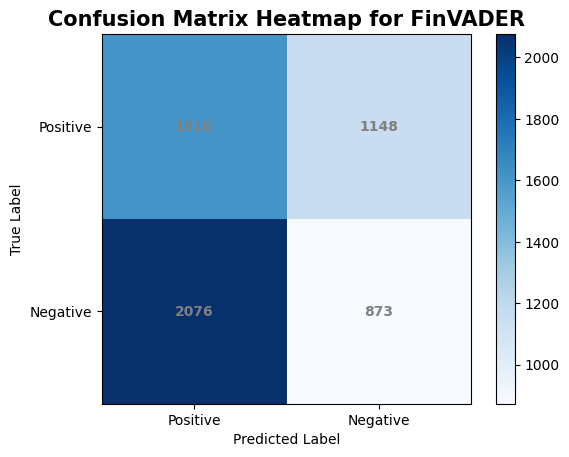

In [15]:
# Confusion Matrix for Finvader

import matplotlib.pyplot as plt
# Define confusion matrix
conf_matrix = np.array([[total_TP, total_FN], [total_FP, total_TN]]) 

# Plot heatmap
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')

# Add color bar
plt.colorbar()

# Add annotations
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='grey', fontsize=10, fontweight='bold')
# Add labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap for FinVADER', fontsize=15, fontweight='bold')

# Customize tick marks
tick_marks = np.arange(len(conf_matrix))
plt.xticks(tick_marks, ['Positive', 'Negative'])
plt.yticks(tick_marks, ['Positive', 'Negative'])

# Show plot
plt.show()

In [16]:
# Finvader Prediction Outcome Statistics
total_TP_v = data['vader_TP'].sum()
total_TN_v = data['vader_TN'].sum()
total_FP_v = data['vader_FP'].sum()
total_FN_v = data['vader_FN'].sum()

print(f"Total True Positives: {total_TP_v}")
print(f"Total True Negatives: {total_TN_v}")
print(f"Total False Positives: {total_FP_v}")
print(f"Total False Negatives: {total_FN_v}")

Total True Positives: 1262
Total True Negatives: 784
Total False Positives: 3266
Total False Negatives: 1641


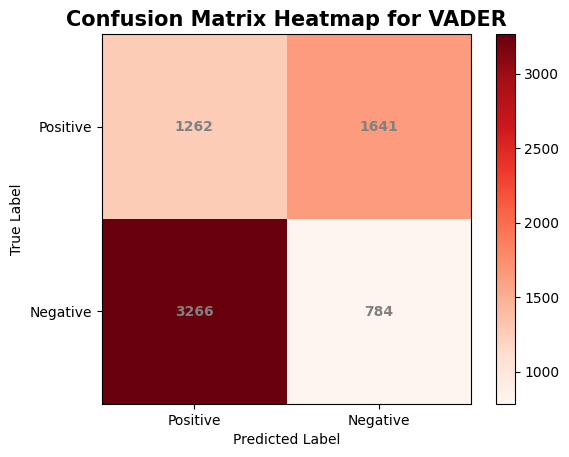

In [17]:
# Confusion Matrix for Vader

import matplotlib.pyplot as plt
# Define confusion matrix
conf_matrix = np.array([[total_TP_v, total_FN_v], [total_FP_v, total_TN_v]]) 

# Plot heatmap
plt.imshow(conf_matrix, cmap='Reds', interpolation='nearest')

# Add color bar
plt.colorbar()

# Add annotations
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='grey', fontsize=10, fontweight='bold')
# Add labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap for VADER', fontsize=15, fontweight='bold')

# Customize tick marks
tick_marks = np.arange(len(conf_matrix))
plt.xticks(tick_marks, ['Positive', 'Negative'])
plt.yticks(tick_marks, ['Positive', 'Negative'])

# Show plot
plt.show()